<b>Dans ce notebook on réalise l'analyse exploratoire du dataset.</b>

# Table of contents
1. [Load clean dataset](#load)
2. [Analyses univariées](#univariate)
3. [Analyses bivariées](#bivariate)
4. [Analyses multivariées](#multivariate)

    4.1 [Analyse descriptive](#desc)
    
    4.2 [Analyse explicative](#expl)
5. [Proposition d'application](#application) 


<b style="background-color:tomato;font-size:14px;">1. LOAD CLEAN DATASET<b>
    <a id="load"></a> 

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

try:
    del data
except:
    dummy=1

#On ne prend qu'un échantillon du fait des limitations mémoire de la machine
data=pd.read_csv('../dataset/en.openfoodfacts.org.products.csv',sep='\t',nrows=300000)

/home/alpro/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<b style="background-color:tomato;font-size:14px;">2. ANALYSES UNIVARIEES<b>
    <a id="univariate"></a> 

In [24]:
key = 'nutrition-score-fr_100g'
#key = "nutriscore_score"
data[key].describe()

count    173766.000000
mean          9.092930
std           9.138611
min         -14.000000
25%           1.000000
50%          11.000000
75%          16.000000
max          37.000000
Name: nutrition-score-fr_100g, dtype: float64

<b style="background-color:tomato;font-size:14px;">3. ANALYSES BIVARIEES<b>
    <a id="bivariate"></a> 

<b style="background-color:tomato;font-size:12px;">3.1 Matrice de correlation<b>
    <a id="correlation_matrix"></a> 

On cherche à détecter les relations linéaires qui peuvent exister entre les variables du dataset. On retient donc pour cela la représentation de la matrice de correlation du coefficient de relation linéaire de Pearson.

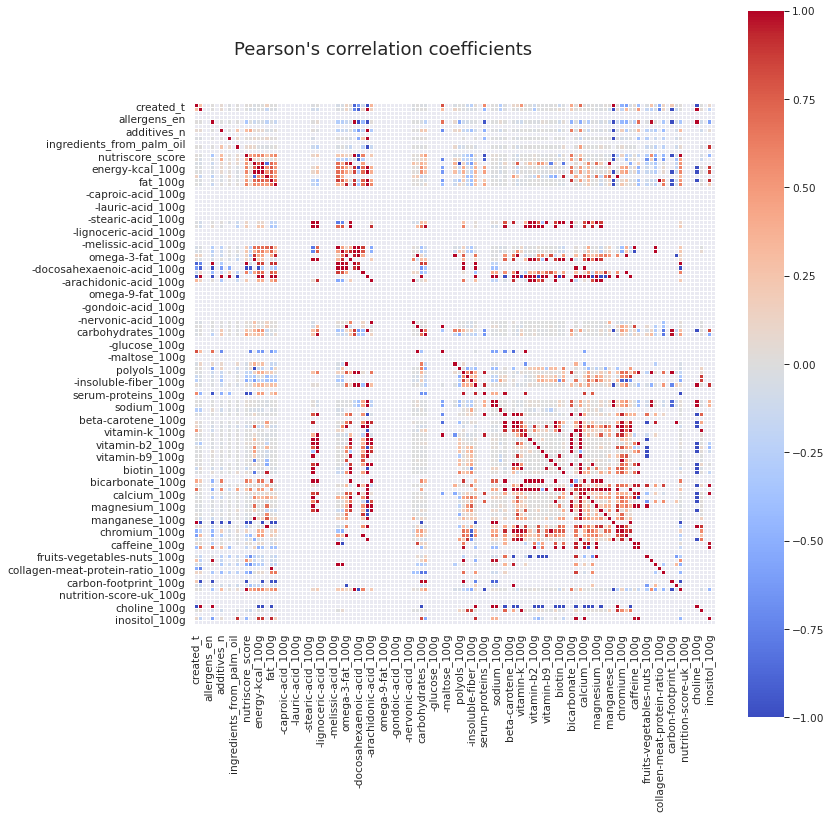

In [7]:
sns.set(context="paper", font_scale = 1.2)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.45, 0.93, "Matrice des coefficients correlation de Pearson", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

<b style="background-color:tomato;font-size:12px;">3.2 Zoom: <b>
    <a id="zoom"></a> 

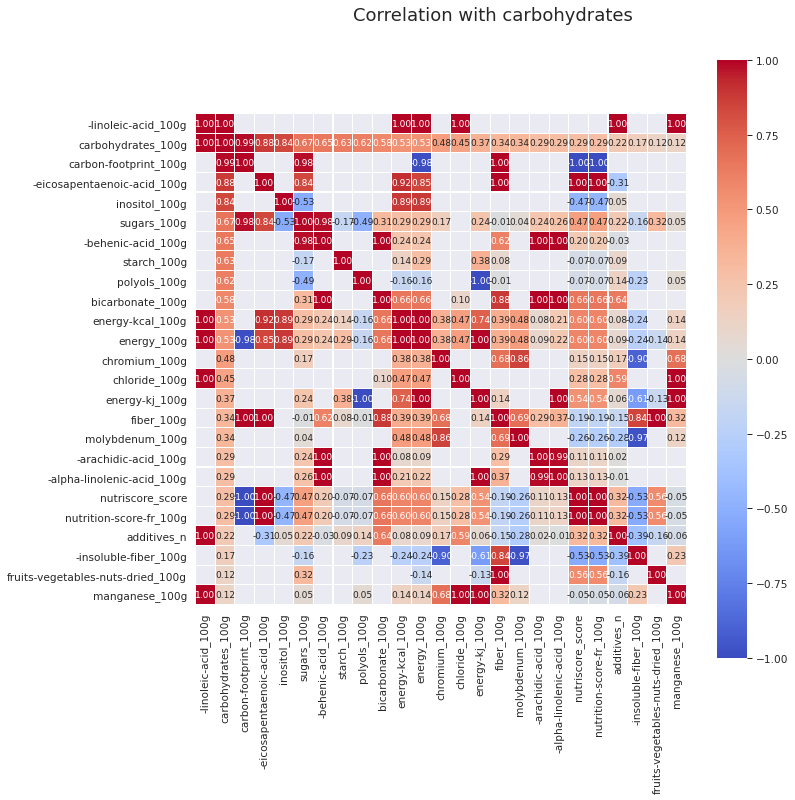

In [8]:
sns.set(context="paper", font_scale = 1.2)
f, ax = plt.subplots(figsize=(11, 11))
cols = corrmat.nlargest(25, 'carbohydrates_100g')['carbohydrates_100g'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation with carbohydrates", ha='center', fontsize = 18)
plt.show()

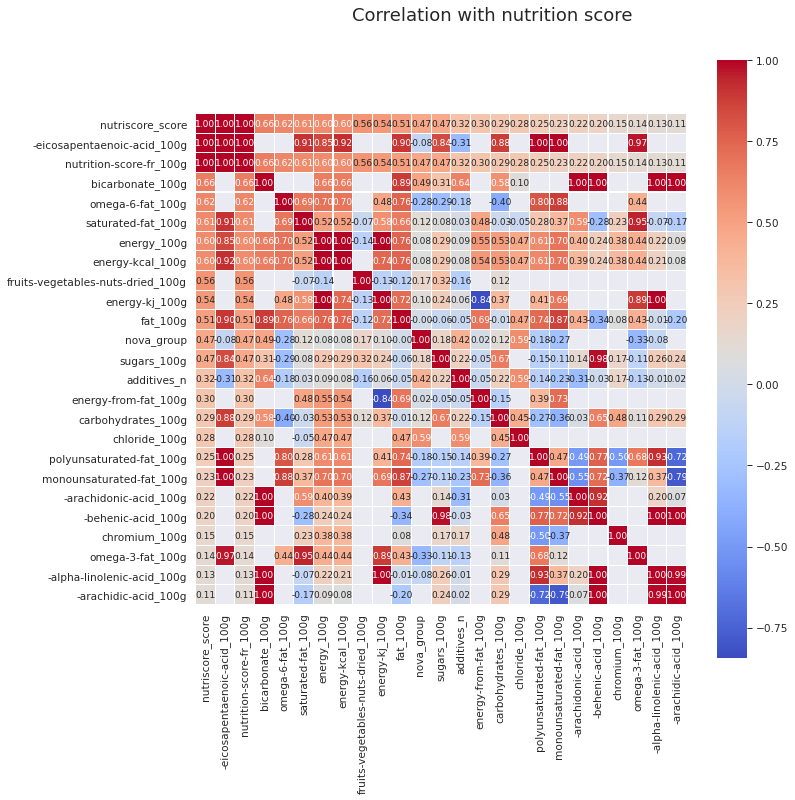

In [9]:
sns.set(context="paper", font_scale = 1.2)
f, ax = plt.subplots(figsize=(11, 11))
cols = corrmat.nlargest(25, 'nutrition-score-fr_100g')['nutrition-score-fr_100g'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation with nutrition score", ha='center', fontsize = 18)
plt.show()

In [11]:
data['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'sugary-snacks', nan, 'fruits-and-vegetables',
       'cereals-and-potatoes'], dtype=object)

In [12]:
categ_prod = [] ; label_prod = []
for i,s in enumerate(data['pnns_groups_1'].unique()):
    if isinstance(s, float): continue
    if s == 'unknown': continue    
    produit = str(s)
    df1 = data[data['pnns_groups_1'] == produit]
    table_1 = pd.Series(df1[pd.notnull(df1['nutrition-score-fr_100g'])]['nutrition-score-fr_100g'])
    categ_prod.append(table_1)
    label_prod.append(s)

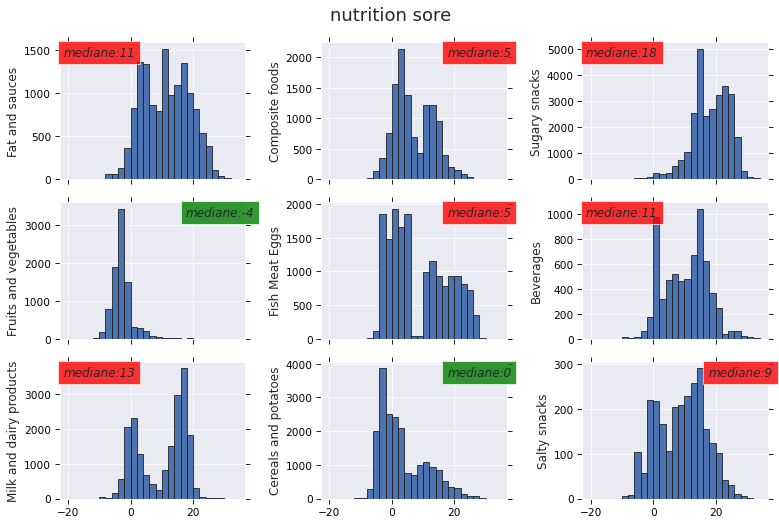

In [13]:
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(11,7))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    t = categ_prod[i].value_counts(sort=True)
    t.sort_index(inplace=True)
    hist = list(t)
    bins = list(t.index)
    
    ax.tick_params(labelcolor='black', top='off', bottom='on', left='on', right='off')
    ax.set_ylabel(label_prod[i], fontsize = 12)
    ax.hist(categ_prod[i], bins=range(-20,36,2), edgecolor = 'k')

    mediane = int(categ_prod[i].median())
    color = 'green' if mediane <= 4 else 'red'
    if mediane < 11:
        ax.text(0.68, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
                transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':color, 'alpha':0.8, 'pad':5})
    else:
        ax.text(0.02, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
                transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':'red', 'alpha':0.8, 'pad':5})
    i += 1

tPlot.text(0.5, 1.01, 'nutrition sore', ha='center', fontsize = 18)
plt.tight_layout()

<b style="background-color:tomato;font-size:14px;">4. ANALYSES MULTIVARIEES<b>
    <a id="multivariate"></a> 

<b style="background-color:tomato;font-size:14px;">4.1 ANALYSE DESCRIPTIVE<b>
    <a id="desc"></a> 

In [ ]:
acp

<b style="background-color:tomato;font-size:14px;">4.2 ANALYSE EXPLICATIVE<b>
    <a id="expl"></a> 

In [ ]:
anova

<b style="background-color:tomato;font-size:14px;">4. PROPOSITION D'APPLICATION<b>
    <a id="application"></a> 